In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from akvmodel import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
NUM_AGENTS = 20
NUM_STEPS = 100

In [38]:
initial_configurations = [
    [InitialConfigurations.uniform(NUM_AGENTS), "Uniform"],
    [InitialConfigurations.mildly(NUM_AGENTS), "Mildly polarized"],
    [InitialConfigurations.extreme(NUM_AGENTS), "Extremely polarized"],
    [InitialConfigurations.tripolar(NUM_AGENTS), "Tripolar"],
]
influence_graphs = [
    [InfluenceGraphs.clique(NUM_AGENTS), "Clique"],
    [InfluenceGraphs.circular(NUM_AGENTS), "Circular"],
    [InfluenceGraphs.faintly(NUM_AGENTS), "Faintly connected"],
    [InfluenceGraphs.disconnected(NUM_AGENTS), "Disconnected"],
    [InfluenceGraphs.malleable_influencers(NUM_AGENTS), "Malleable influencers"],
    [InfluenceGraphs.unrelenting_influencers(NUM_AGENTS), "Unrelenting influencers"],
]

### Classic belief update and dynamic influence

In [39]:
models: list[list[AKV]] = []
for influence_graph in influence_graphs:
    line = []
    for initial_configuration in initial_configurations:
        model = AKV(
            initial_configuration[0],
            influence_graph[0],
            UpdateFunctions.dynamic_influence_with_belief_update,
        )
        for _ in range(NUM_STEPS):
            model.update()
        line = line + [model]
    models = models + [line]

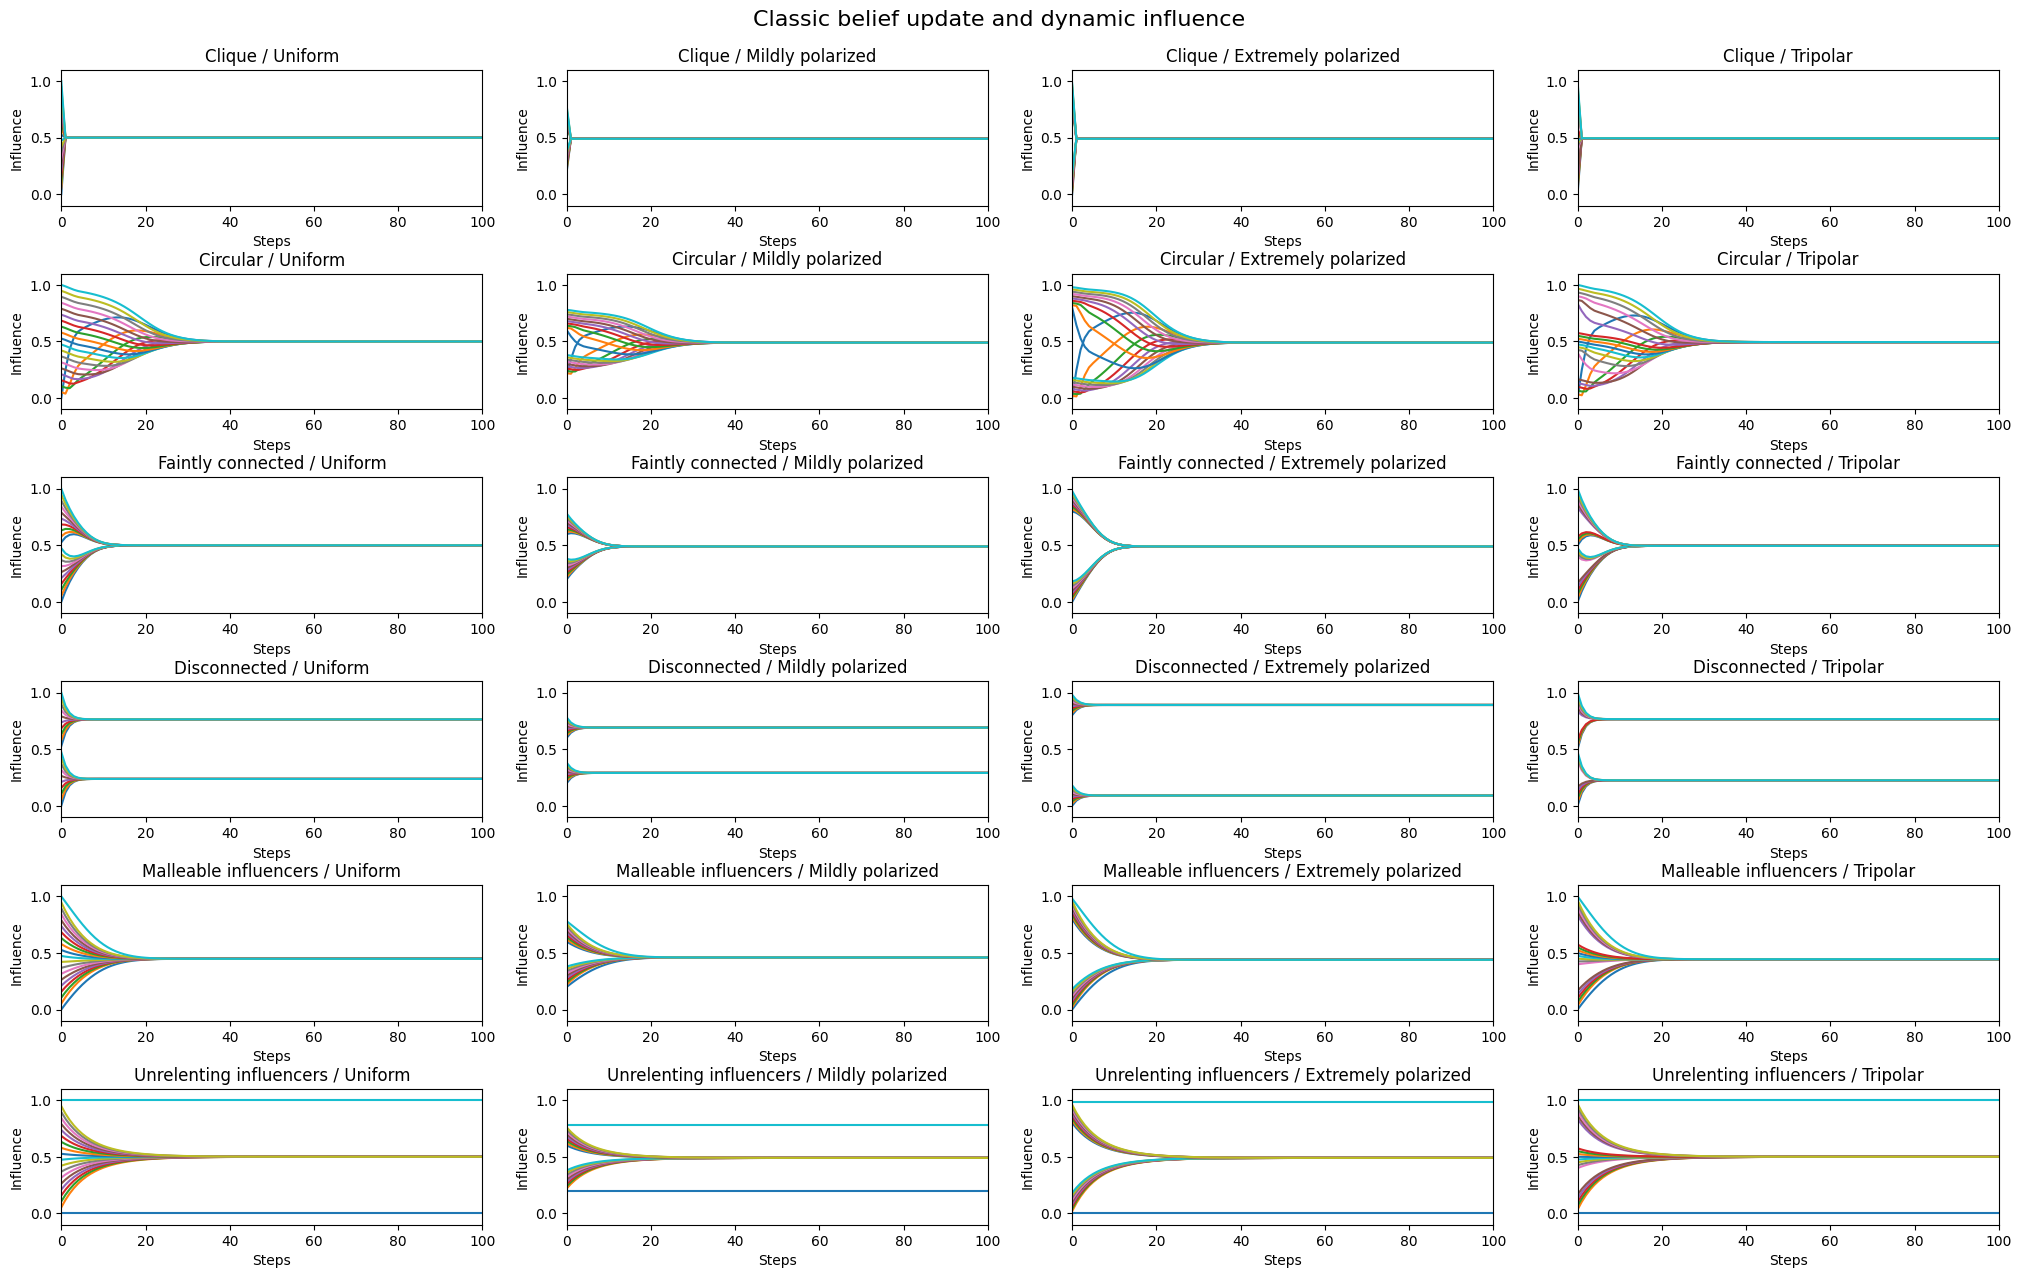

In [40]:
fig, axs = plt.subplots(
    len(influence_graphs), len(initial_configurations), figsize=[25, 15]
)
fig.suptitle(f"Classic belief update and dynamic influence", fontsize=16, y=0.92)
fig.subplots_adjust(hspace=0.5)
for i in range(len(influence_graphs)):
    for j in range(len(initial_configurations)):
        ax: plt.axes = axs[i][j]
        ax.plot(get_belief_array_history(models[i][j].belief_state_history))
        ax.set_xlim(0, NUM_STEPS)
        ax.set_ylim(-0.1, 1.1)
        ax.set_ymargin(1)
        ax.set_ymargin(1)
        ax.set_xlabel("Steps")
        ax.set_ylabel("Influence")
        ax.set_title(f"{influence_graphs[i][1]} / {initial_configurations[j][1]}")

In [41]:
polarization = []
for i in range(len(influence_graphs)):
    row = []
    for j in range(len(initial_configurations)):
        row += [models[i][j].get_polarization()[0]]
    polarization += [row]

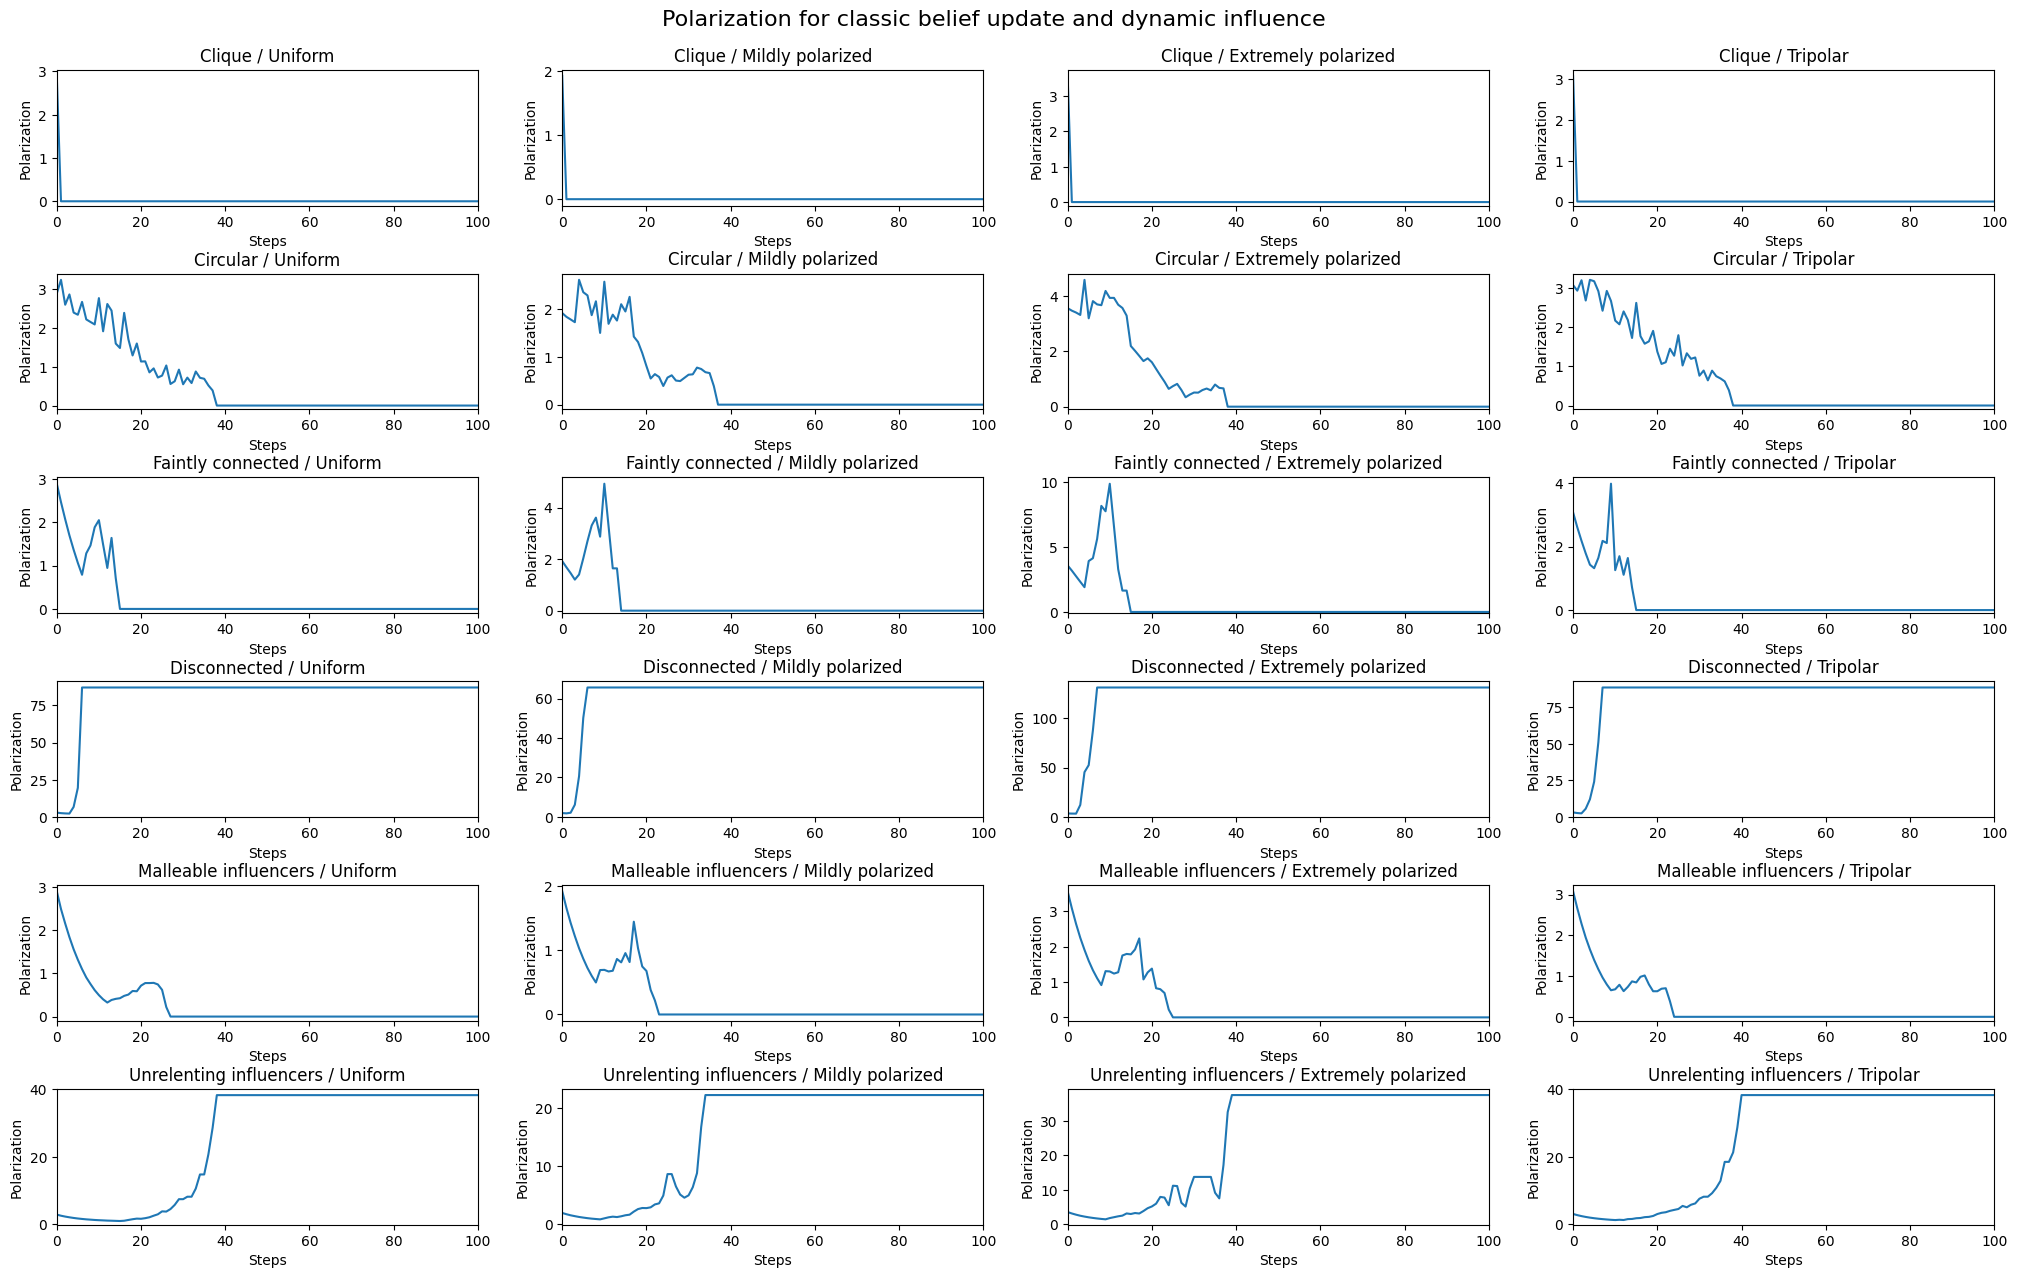

In [42]:
fig, axs = plt.subplots(
    len(influence_graphs), len(initial_configurations), figsize=[25, 15]
)
fig.suptitle(
    f"Polarization for classic belief update and dynamic influence", fontsize=16, y=0.92
)
fig.subplots_adjust(hspace=0.5)
for i in range(len(influence_graphs)):
    for j in range(len(initial_configurations)):
        ax: plt.axes = axs[i][j]
        ax.plot(polarization[i][j])
        ax.set_xlim(0, NUM_STEPS)
        ax.set_ylim(-0.1)
        ax.set_ymargin(1)
        ax.set_ymargin(1)
        ax.set_xlabel("Steps")
        ax.set_ylabel("Polarization")
        ax.set_title(f"{influence_graphs[i][1]} / {initial_configurations[j][1]}")